/var/folders/t3/5g06g87x3k32kcs57k9p9y1r0000gn/T/ipykernel_9620/1058233136.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  sample = np.random.multivariate_normal(means[component], covariances[component])
/var/folders/t3/5g06g87x3k32kcs57k9p9y1r0000gn/T/ipykernel_9620/1058233136.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  sample = np.random.multivariate_normal(means[component], covariances[component])
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
find

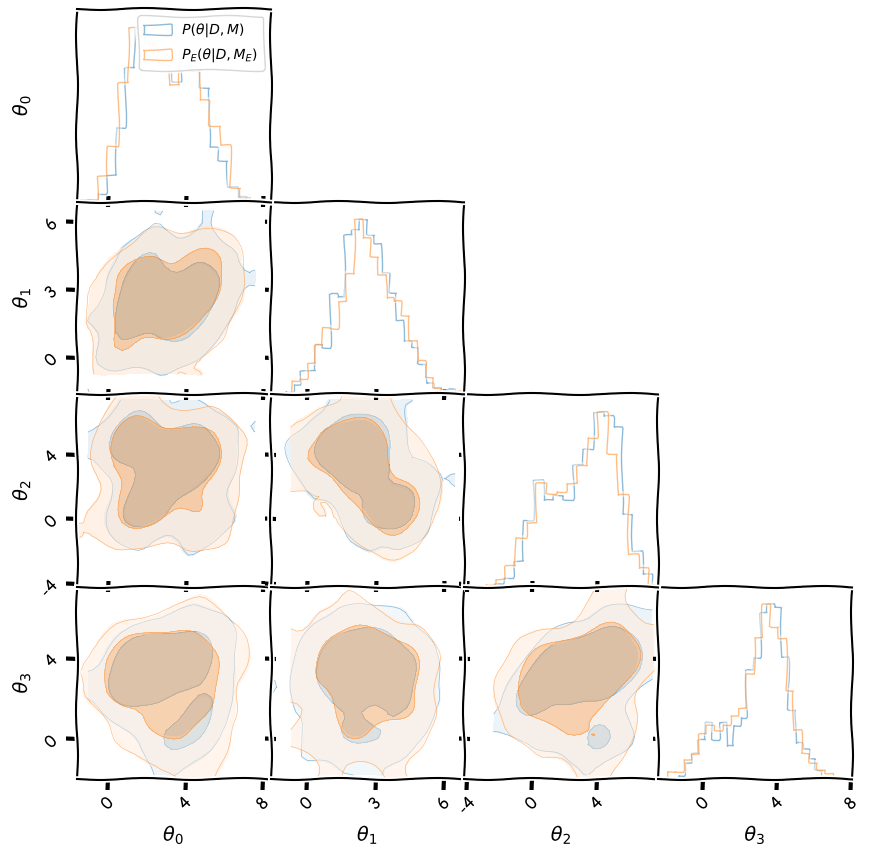

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from anesthetic import MCMCSamples

plt.xkcd()

def mixture_model(means, covariances, weights, nsamples):
    """Generate samples from a mixture model."""
    n_components = len(weights)
    samples = []
    for _ in range(nsamples):
        component = np.random.choice(n_components, p=weights)
        sample = np.random.multivariate_normal(means[component], covariances[component])
        samples.append(sample)
    return np.array(samples)

ndims = 4
nmixtures = 10

means = np.random.rand(nmixtures, ndims)*5 # 5 components in 2D
covariances = [np.random.rand(ndims, ndims) for _ in range(nmixtures)]  # Random covariance matrices
weights = np.random.dirichlet(np.ones(nmixtures))  # Random weights for the mixture model
nsamples = 1000  # Number of samples to generate
data = mixture_model(means, covariances, weights, nsamples)
samples = MCMCSamples(data, columns=[fr'$\theta_{i}$' for i in range(ndims)])
axes = samples.plot_2d(kinds={'lower':'kde_2d', 'diagonal':'hist_1d'},
                figsize=(10, 10), color='C0', alpha=0.5, diagonal_kwargs={'histtype': 'step'},
                label = r'$P(\theta|D, M)$')

means = means #* np.random.uniform(0.001, 0.1, size=means.shape)  # Scale means
covariances = [cov * np.random.uniform(0.1, 2, size=cov.shape) for cov in covariances]  # Scale covariances
data = mixture_model(means, covariances, weights, nsamples)
samples = MCMCSamples(data, columns=[fr'$\theta_{i}$' for i in range(ndims)])
samples.plot_2d(axes, kinds={'lower':'kde_2d', 'diagonal':'hist_1d'},
                color='C1', alpha=0.5, diagonal_kwargs={'histtype': 'step'}, label=r'$P_E(\theta|D, M_E)$')
axes.iloc[0, 0].legend(loc='upper right', fontsize=10)
plt.savefig('mixture_model_samples.png', dpi=300)
plt.show()

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

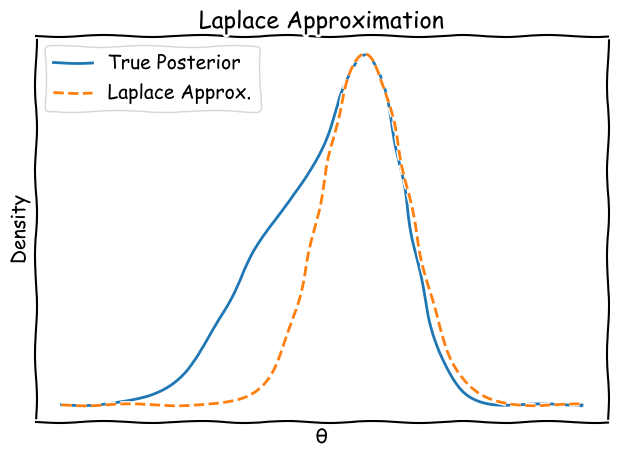

In [11]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax.scipy.special import logsumexp

# Define a skewed log-posterior: mixture of two Gaussians
def neg_log_posterior(theta):
    log_p = jnp.log(
        0.7 * jax.scipy.stats.norm.pdf(theta, loc=1.0, scale=0.5) +
        0.6 * jax.scipy.stats.norm.pdf(theta, loc=1.7, scale=0.3)
    )
    return -log_p  # Negative log-posterior

# Approximate posterior: Gaussian centered at MAP
def laplace_posterior(theta):
    return jax.scipy.stats.norm.pdf(theta, loc=theta_map, scale=posterior_std)

# True posterior: normalized mixture (for plotting)
def true_posterior(theta):
    return (
        0.7 * jax.scipy.stats.norm.pdf(theta, loc=1.0, scale=0.5) +
        0.6 * jax.scipy.stats.norm.pdf(theta, loc=1.7, scale=0.3)
    )

theta_vals = jnp.linspace(-1, 3.5, 500)
true_vals = true_posterior(theta_vals)
theta_map = theta_vals[np.argmax(true_vals)]  # MAP estimate

# Laplace approximation around MAP
hessian = jax.grad(jax.grad(neg_log_posterior))(theta_map)
posterior_std = jnp.sqrt(1.0 / hessian)

approx_vals = laplace_posterior(theta_vals)

scale_factor = true_posterior(theta_map) / laplace_posterior(theta_map)
approx_vals *= scale_factor


plt.plot(theta_vals, true_vals, label='True Posterior', color='C0')
plt.plot(theta_vals, approx_vals, '--', label='Laplace Approx.', color='C1')
plt.legend()
plt.title("Laplace Approximation")
plt.xlabel("θ")
plt.ylabel("Density")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('laplace_approximation.png', dpi=300)
plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

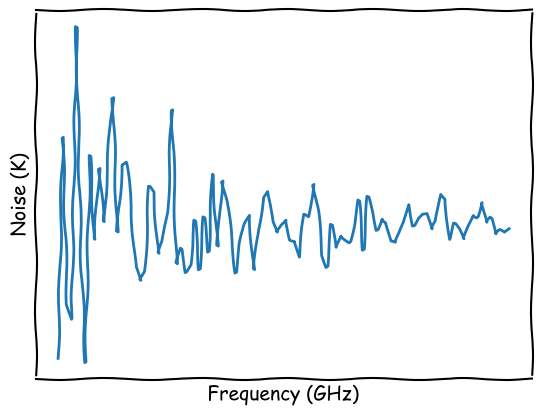

In [3]:
tau = 10
bandwidth = 100
channels = 100
x = np.linspace(50, 50 + bandwidth, channels)
Tsky = 5e8*x**(-2.5)
sigma = Tsky / np.sqrt(tau* bandwidth/channels)

plt.plot(x, np.random.normal(0, sigma, len(sigma)), color='C0')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Noise (K)')
plt.xticks([])
plt.yticks([])
plt.savefig('noise_spectrum.png', dpi=300, bbox_inches='tight')
plt.show()

AttributeError: 'NoneType' object has no attribute 'set_xticks'

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

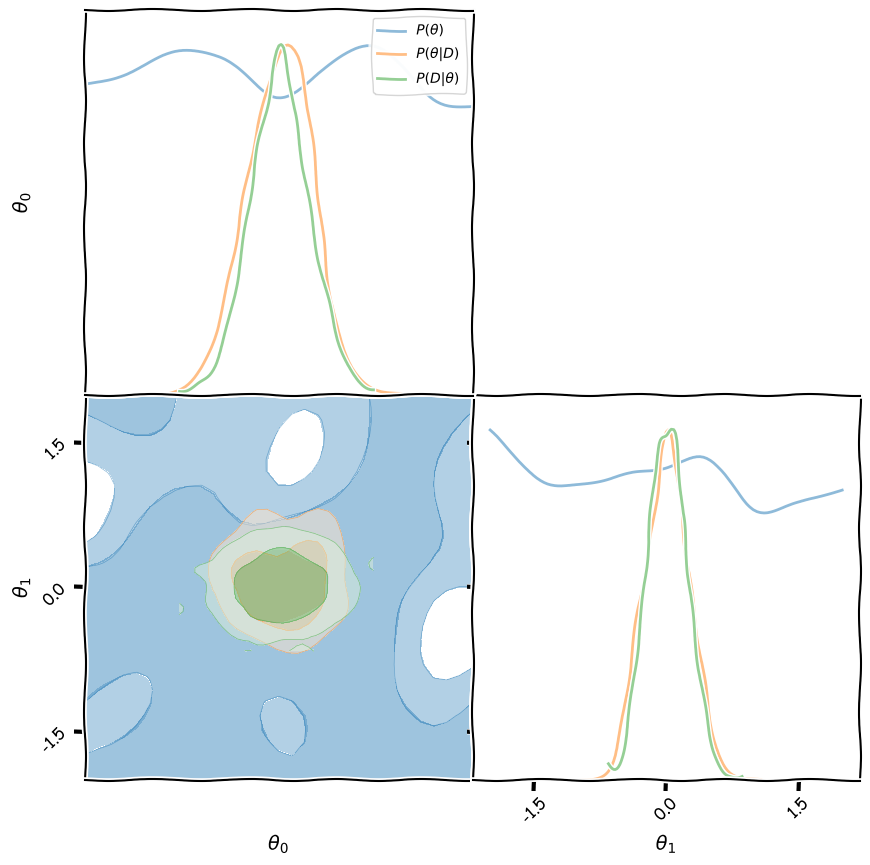

In [ ]:
import numpy as np

# Simulate posterior samples
np.random.seed(42)
true_params = np.array([0.0, 0.0])
cov_diag = np.array([0.1, 0.05])
cov = np.diag(cov_diag)
inv_cov = np.linalg.inv(cov)
log_det_cov = np.log(np.linalg.det(cov))

def gaussian_logpdf(x, mean, inv_cov, log_det_cov):
    diff = x - mean
    return -0.5 * (len(x) * np.log(2 * np.pi) + log_det_cov + diff @ inv_cov @ diff)
# Generate samples from the likelihood
samples = np.random.multivariate_normal(true_params, cov, size=1000)

# Apply uniform prior bounds (truncate samples)
prior_bounds = [(-2, 2), (-2, 2), (-2, 2)]
prior_probability = 3/4
prior = np.random.uniform(low=-2, high=2, size=(1000, 2))

posterior_weights = [gaussian_logpdf(p, true_params, inv_cov, log_det_cov) + np.log(prior_probability)
                     for p in prior]
posterior_weights = np.exp(posterior_weights)
posterior_weights /= np.sum(posterior_weights)

prior_samples = MCMCSamples(prior, columns=[fr'$\theta_{i}$' for i in range(2)])
axes = prior_samples.plot_2d(kinds={'lower':'kde_2d', 'diagonal':'kde_1d'},
                figsize=(10, 10), color='C0', alpha=0.5,
                label = r'$P(\theta)$')
posterior_samples = MCMCSamples(prior, columns=[fr'$\theta_{i}$' for i in range(2)], weights=posterior_weights)
posterior_samples.plot_2d(axes, kinds={'lower':'kde_2d', 'diagonal':'kde_1d'},
                color='C1', alpha=0.5, label=r'$P(\theta|D)$')
likelihood = MCMCSamples(samples, columns=[fr'$\theta_{i}$' for i in range(2)])
likelihood.plot_2d(axes, kinds={'lower':'kde_2d', 'diagonal':'kde_1d'},
                color='C2', alpha=0.5, label=r'$P(D|\theta)$')
axes.iloc[0, 0].legend(loc='upper right', fontsize=10)

for i in range(2):
    for j in range(2):
        if i >= j:
            axes.iloc[i, j].set_xticks([])
            axes.iloc[i, j].set_yticks([])
plt.savefig('example-assumed-distributions.png')
plt.show()

